# Contents 

01. Importing libraries
02. Importing data
03. Checking and cleaning data
04. Descriptive analysis
    * Summary statistics for energy consumption variables
    * Home type versus total energy usage
    * Home age versus total energy usage
05. Correlation matrix
06. Pairplot

    

## 01. Importing libraries

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## 02. Importing data

In [2]:
# importing by using os.path.join() function 

path = r'/Users/lindazhang/RECS Analysis'
df_recs = pd.read_csv(os.path.join(path, '02 Datasets', 'Original Data', '2015_RECS_data.csv'), index_col = False)


## 03. Checking and cleaning data 

In [3]:
# Display first 10 rows of dataset

df_recs.head(10)

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,10001,4,10,METRO,U,2,0,0,0,-2,...,0,103.32,1,0,137.45,-2,-2,91.33,-2,-2
1,10002,3,7,NONE,R,2,0,0,0,-2,...,1,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
2,10003,3,6,METRO,U,2,0,1,0,1,...,0,100.14,1,0,137.45,-2,-2,91.33,-2,-2
3,10004,2,4,MICRO,C,2,0,1,0,1,...,0,NaN,-2,-2,137.45,-2,-2,91.33,2,0
4,10005,1,2,METRO,U,2,0,1,0,0,...,0,102.83,1,0,137.45,-2,-2,91.33,-2,-2
5,10006,1,1,NONE,C,5,0,-2,-2,-2,...,1,NaN,-2,-2,137.45,-2,-2,91.33,5,1
6,10007,3,5,METRO,U,4,0,-2,-2,-2,...,0,102.79,1,0,137.45,-2,-2,91.33,-2,-2
7,10008,2,3,METRO,R,2,0,1,0,1,...,0,101.53,1,0,137.45,-2,-2,91.33,-2,-2
8,10009,1,2,METRO,U,2,0,0,0,-2,...,0,NaN,-2,-2,137.45,1,0,91.33,-2,-2
9,10010,3,7,METRO,U,2,0,0,0,-2,...,0,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2


In [4]:
# number of columns, rows, column names, and data types

df_recs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Columns: 759 entries, DOEID to ZLPAMOUNT
dtypes: float64(262), int64(493), object(4)
memory usage: 32.9+ MB


In [5]:
# Checking for missing values...looks like the only column with missing value is NGXBTU which is conversion factor. 

df_recs.isnull().sum()


DOEID         0
REGIONC       0
DIVISION      0
METROMICRO    0
UATYP10       0
             ..
PERIODFO      0
ZFOAMOUNT     0
LPXBTU        0
PERIODLP      0
ZLPAMOUNT     0
Length: 759, dtype: int64

In [6]:
# checking for duplicates...looks like there are none. 

df_recs_dups = df_recs[df_recs.duplicated()]
df_recs_dups

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT


In [7]:
# Checking for mixed data type columns...looks like there are none. 

for col in df_recs.columns.tolist():
  weird = (df_recs[[col]].applymap(type) != df_recs[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_recs[weird]) > 0:
    print (col)

## 04. Descriptive analysis

### Summary statistics for energy consumption variables

In [8]:
# creating a subset

sub_recs = df_recs [['TOTALBTU','TOTALBTUSPH','TOTALBTUWTH','TOTALBTUCOK','BTUELCOL','BTUELRFG','BTUELLGT','DIVISION','CDD65','HDD65',
                     'NHSLDMEM','YEARMADERANGE', 'TYPEHUQ','TOTROOMS']]

# renaming columns 

dict = {
'TOTALBTU': 'total_usage',
'TOTALBTUSPH': 'total_space_heating_usage',
'TOTALBTUWTH': 'total_water_heating_usage',
'TOTALBTUCOK':'total_cooking_usage',
'BTUELCOL':'total_ac_usage',
'BTUELRFG': 'total_fridge_usage',
'BTUELLGT': 'total_lights_usage',
'DIVISION': 'census_division',
'CDD65':'cooling_degree_days',
'HDD65':'heating_degree_days',
'NHSLDMEM': '# household members',
'YEARMADERANGE': 'year_house_built',
'TYPEHUQ': 'type_of_house',
'TOTROOMS': 'total_house_rooms'}

sub_recs.rename(columns = dict, inplace = True)


# creating a new column of "all other usage"

col_list = ['total_space_heating_usage','total_water_heating_usage','total_ac_usage', 'total_cooking_usage', 'total_fridge_usage', 'total_lights_usage']

sub_recs['all_other'] = sub_recs ['total_usage'] - sub_recs[col_list].sum(axis=1)




/var/folders/j6/vcs2ps6j3pl6z1p5390gh8h00000gn/T/ipykernel_903/3308279110.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_recs.rename(columns = dict, inplace = True)
/var/folders/j6/vcs2ps6j3pl6z1p5390gh8h00000gn/T/ipykernel_903/3308279110.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_recs['all_other'] = sub_recs ['total_usage'] - sub_recs[col_list].sum(axis=1)


In [9]:
# display table 

sub_recs.head()

,total_usage,total_space_heating_usage,total_water_heating_usage,total_cooking_usage,total_ac_usage,total_fridge_usage,total_lights_usage,census_division,cooling_degree_days,heating_degree_days,# household members,year_house_built,type_of_house,total_house_rooms,all_other
0,48974.570,12469.727,17535.625,985.448,6795.016,1443.108,1397.731,10,1768,2031,4,7,2,7,8347.915
1,41534.000,11570.020,7129.985,1006.820,7587.322,2568.243,3785.945,7,2795,1915,2,5,2,4,7885.665
2,96548.160,23499.517,18444.442,4650.068,23328.992,4998.729,3130.138,6,2235,2263,4,4,2,9,18496.274
3,89284.345,52408.189,8077.839,384.600,12061.243,2183.613,1653.232,4,1374,3754,1,2,2,7,12515.629
4,36582.146,5339.841,17331.011,2265.816,1135.176,1062.732,2060.978,2,993,5401,3,4,2,6,7386.592


In [10]:
sub_recs.describe()

,total_usage,total_space_heating_usage,total_water_heating_usage,total_cooking_usage,total_ac_usage,total_fridge_usage,total_lights_usage,census_division,cooling_degree_days,heating_degree_days,# household members,year_house_built,type_of_house,total_house_rooms,all_other
count,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.00000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000
mean,77722.892022,33039.198544,14891.034708,1630.737866,6338.705352,2664.471372,3896.228060,5.670243,1719.20612,3707.848751,2.577383,4.323954,2.596025,6.191347,15262.516120
std,46962.309685,33492.607918,9049.465173,1893.246360,7632.061859,1648.108399,4223.864444,2.842655,1193.56296,2149.272713,1.432224,2.125081,1.164641,2.360918,14604.458829
min,201.574000,0.000000,0.000000,0.000000,0.000000,0.000000,24.744000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,64.911000
25%,42655.828000,7158.248750,8471.688250,513.406000,1284.097500,1635.588000,1349.366750,3.000000,793.00000,1881.000000,2.000000,3.000000,2.000000,5.000000,7192.586250
50%,68663.346000,21845.190000,13005.839000,1001.070000,3731.263000,2263.569000,2617.882000,5.000000,1378.00000,3877.500000,2.000000,4.000000,2.000000,6.000000,11719.458500
75%,103832.874500,49450.211000,19160.172250,2084.904500,8621.248750,3297.436000,4911.597750,8.000000,2231.00000,5467.000000,3.000000,6.000000,3.000000,8.000000,18305.465500
max,490187.407000,277614.771000,73862.087000,35817.336000,69447.250000,19047.857000,65145.526000,10.000000,6607.00000,9843.000000,12.000000,8.000000,5.000000,19.000000,332186.622000


Observations: 

Space heating and water heating make up the largest porportions of total household energy usage. 

The average number of heating days is more than double the average number of cooling days. 

The average number of household members among US households is between 2-3 and the average number of house rooms is 6. 


In [11]:
# exporting subset as excel file into prepared data folder 

sub_recs.to_excel(os.path.join(path, '02 Datasets','Prepared Data', 'consumption_subset.xlsx'))

### Home type versus total energy usage

In [12]:
# count of survey responses for each housing type

housing_type = df_recs['TYPEHUQ'].value_counts().to_frame().transpose()

dictionary = {1:'Mobile home',
2:'Single family house',
3: 'Single family house attached to 1+ houses',
4: 'Apartment in building with 2-4 units',
5:'Apartment in building with 5+ units'}

housing_type.rename(columns = dictionary, inplace = True)

housing_type

,Single family house,Apartment in building with 5+ units,Single family house attached to 1+ houses,Apartment in building with 2-4 units,Mobile home
TYPEHUQ,3752,858,479,311,286


Most survey respondents lived in a single family home. 

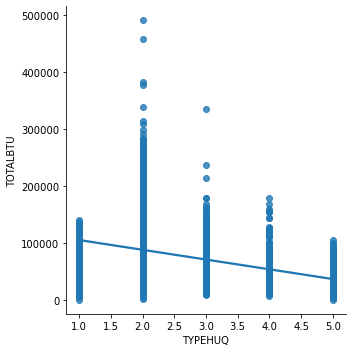

In [13]:
# scatter plot of home type vs total energy usage 

sns.lmplot(x = 'TYPEHUQ', y = 'TOTALBTU', data = df_recs)

Single family homes use signifcantly more energy than apartments and mobile homes. 

### Home age versus total energy usage

In [14]:
# count of survey responses for housing age 

house_year_made = df_recs['YEARMADERANGE'].value_counts().to_frame().transpose()

dictionary = {1:'Before 1950',
2:'1950 to 1959',
3: '1960 to 1969',
4: '1970 to 1979',
5:'1980 to 1989',
6:'1990 to 1999',
7: '2000 to 2009',
8: '2010 to 2015'}

house_year_made.rename(columns = dictionary, inplace = True)

house_year_made

,1970 to 1979,2000 to 2009,1980 to 1989,Before 1950,1990 to 1999,1960 to 1969,1950 to 1959,2010 to 2015
YEARMADERANGE,928,901,874,858,786,565,544,230


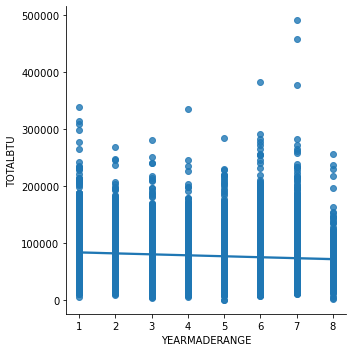

In [15]:
# scatter plot of year house was built and total energy usage 

sns.lmplot(x = 'YEARMADERANGE', y = 'TOTALBTU', data = df_recs)

The year the house was built doesn't seem to have a strong relationship with total energy usage.  

## 05. Correlation matrix 

Key question: What factors impact total energy usage in US households? 

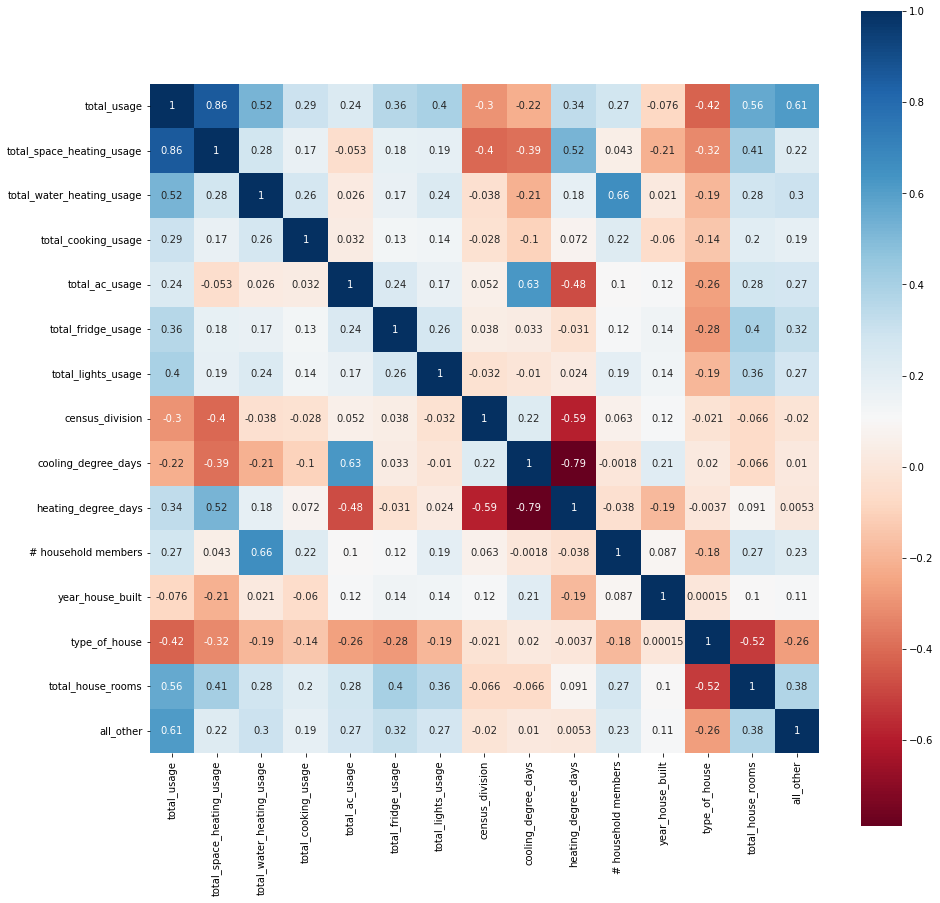

In [16]:
f,ax = plt.subplots(figsize=(15,15))


corr = sns.heatmap(sub_recs.corr(), annot = True, ax = ax, cmap='RdBu', square = True) 

Strong relationship with total energy usage: total space heating usage (0.86)

Moderate relationship with total energy usage: total water heating usage (0.52), electricity usage for lights (0.4), 
heating degree days (0.34), electricity usage for fridges (0.36), electricity usage for lights (0.4), total house rooms (0.56) 

In [17]:
# get table of correlation coefficients 

df_correlations = sub_recs.corr()

df_correlations

,total_usage,total_space_heating_usage,total_water_heating_usage,total_cooking_usage,total_ac_usage,total_fridge_usage,total_lights_usage,census_division,cooling_degree_days,heating_degree_days,# household members,year_house_built,type_of_house,total_house_rooms,all_other
total_usage,1.000000,0.855773,0.524737,0.294996,0.237844,0.360729,0.395240,-0.296301,-0.217715,0.335286,0.274737,-0.076376,-0.424311,0.564242,0.610358
total_space_heating_usage,0.855773,1.000000,0.276336,0.173409,-0.053153,0.176874,0.187641,-0.404661,-0.390508,0.521414,0.043172,-0.209555,-0.323310,0.411433,0.218362
total_water_heating_usage,0.524737,0.276336,1.000000,0.262469,0.025621,0.168832,0.237559,-0.037717,-0.210916,0.182749,0.657810,0.020504,-0.188232,0.281566,0.298814
total_cooking_usage,0.294996,0.173409,0.262469,1.000000,0.032079,0.127428,0.140160,-0.028341,-0.102112,0.072218,0.219195,-0.060228,-0.139206,0.204455,0.186960
total_ac_usage,0.237844,-0.053153,0.025621,0.032079,1.000000,0.242413,0.171943,0.051537,0.628018,-0.476260,0.100681,0.115672,-0.258919,0.278435,0.267007
total_fridge_usage,0.360729,0.176874,0.168832,0.127428,0.242413,1.000000,0.262084,0.037972,0.032893,-0.030843,0.116202,0.140858,-0.283072,0.401966,0.317873
total_lights_usage,0.395240,0.187641,0.237559,0.140160,0.171943,0.262084,1.000000,-0.031862,-0.010242,0.023660,0.191283,0.137756,-0.193900,0.355137,0.266602
census_division,-0.296301,-0.404661,-0.037717,-0.028341,0.051537,0.037972,-0.031862,1.000000,0.224647,-0.586347,0.062889,0.118961,-0.020586,-0.065924,-0.019733
cooling_degree_days,-0.217715,-0.390508,-0.210916,-0.102112,0.628018,0.032893,-0.010242,0.224647,1.000000,-0.788965,-0.001754,0.213675,0.019672,-0.066260,0.010458
heating_degree_days,0.335286,0.521414,0.182749,0.072218,-0.476260,-0.030843,0.023660,-0.586347,-0.788965,1.000000,-0.037586,-0.187306,-0.003702,0.091048,0.005307


In [18]:
# export as excel file into prepared data folder 

df_correlations.to_excel(os.path.join(path, '02 Datasets','Prepared Data', 'correlations.xlsx'))

## 06. Pairplot

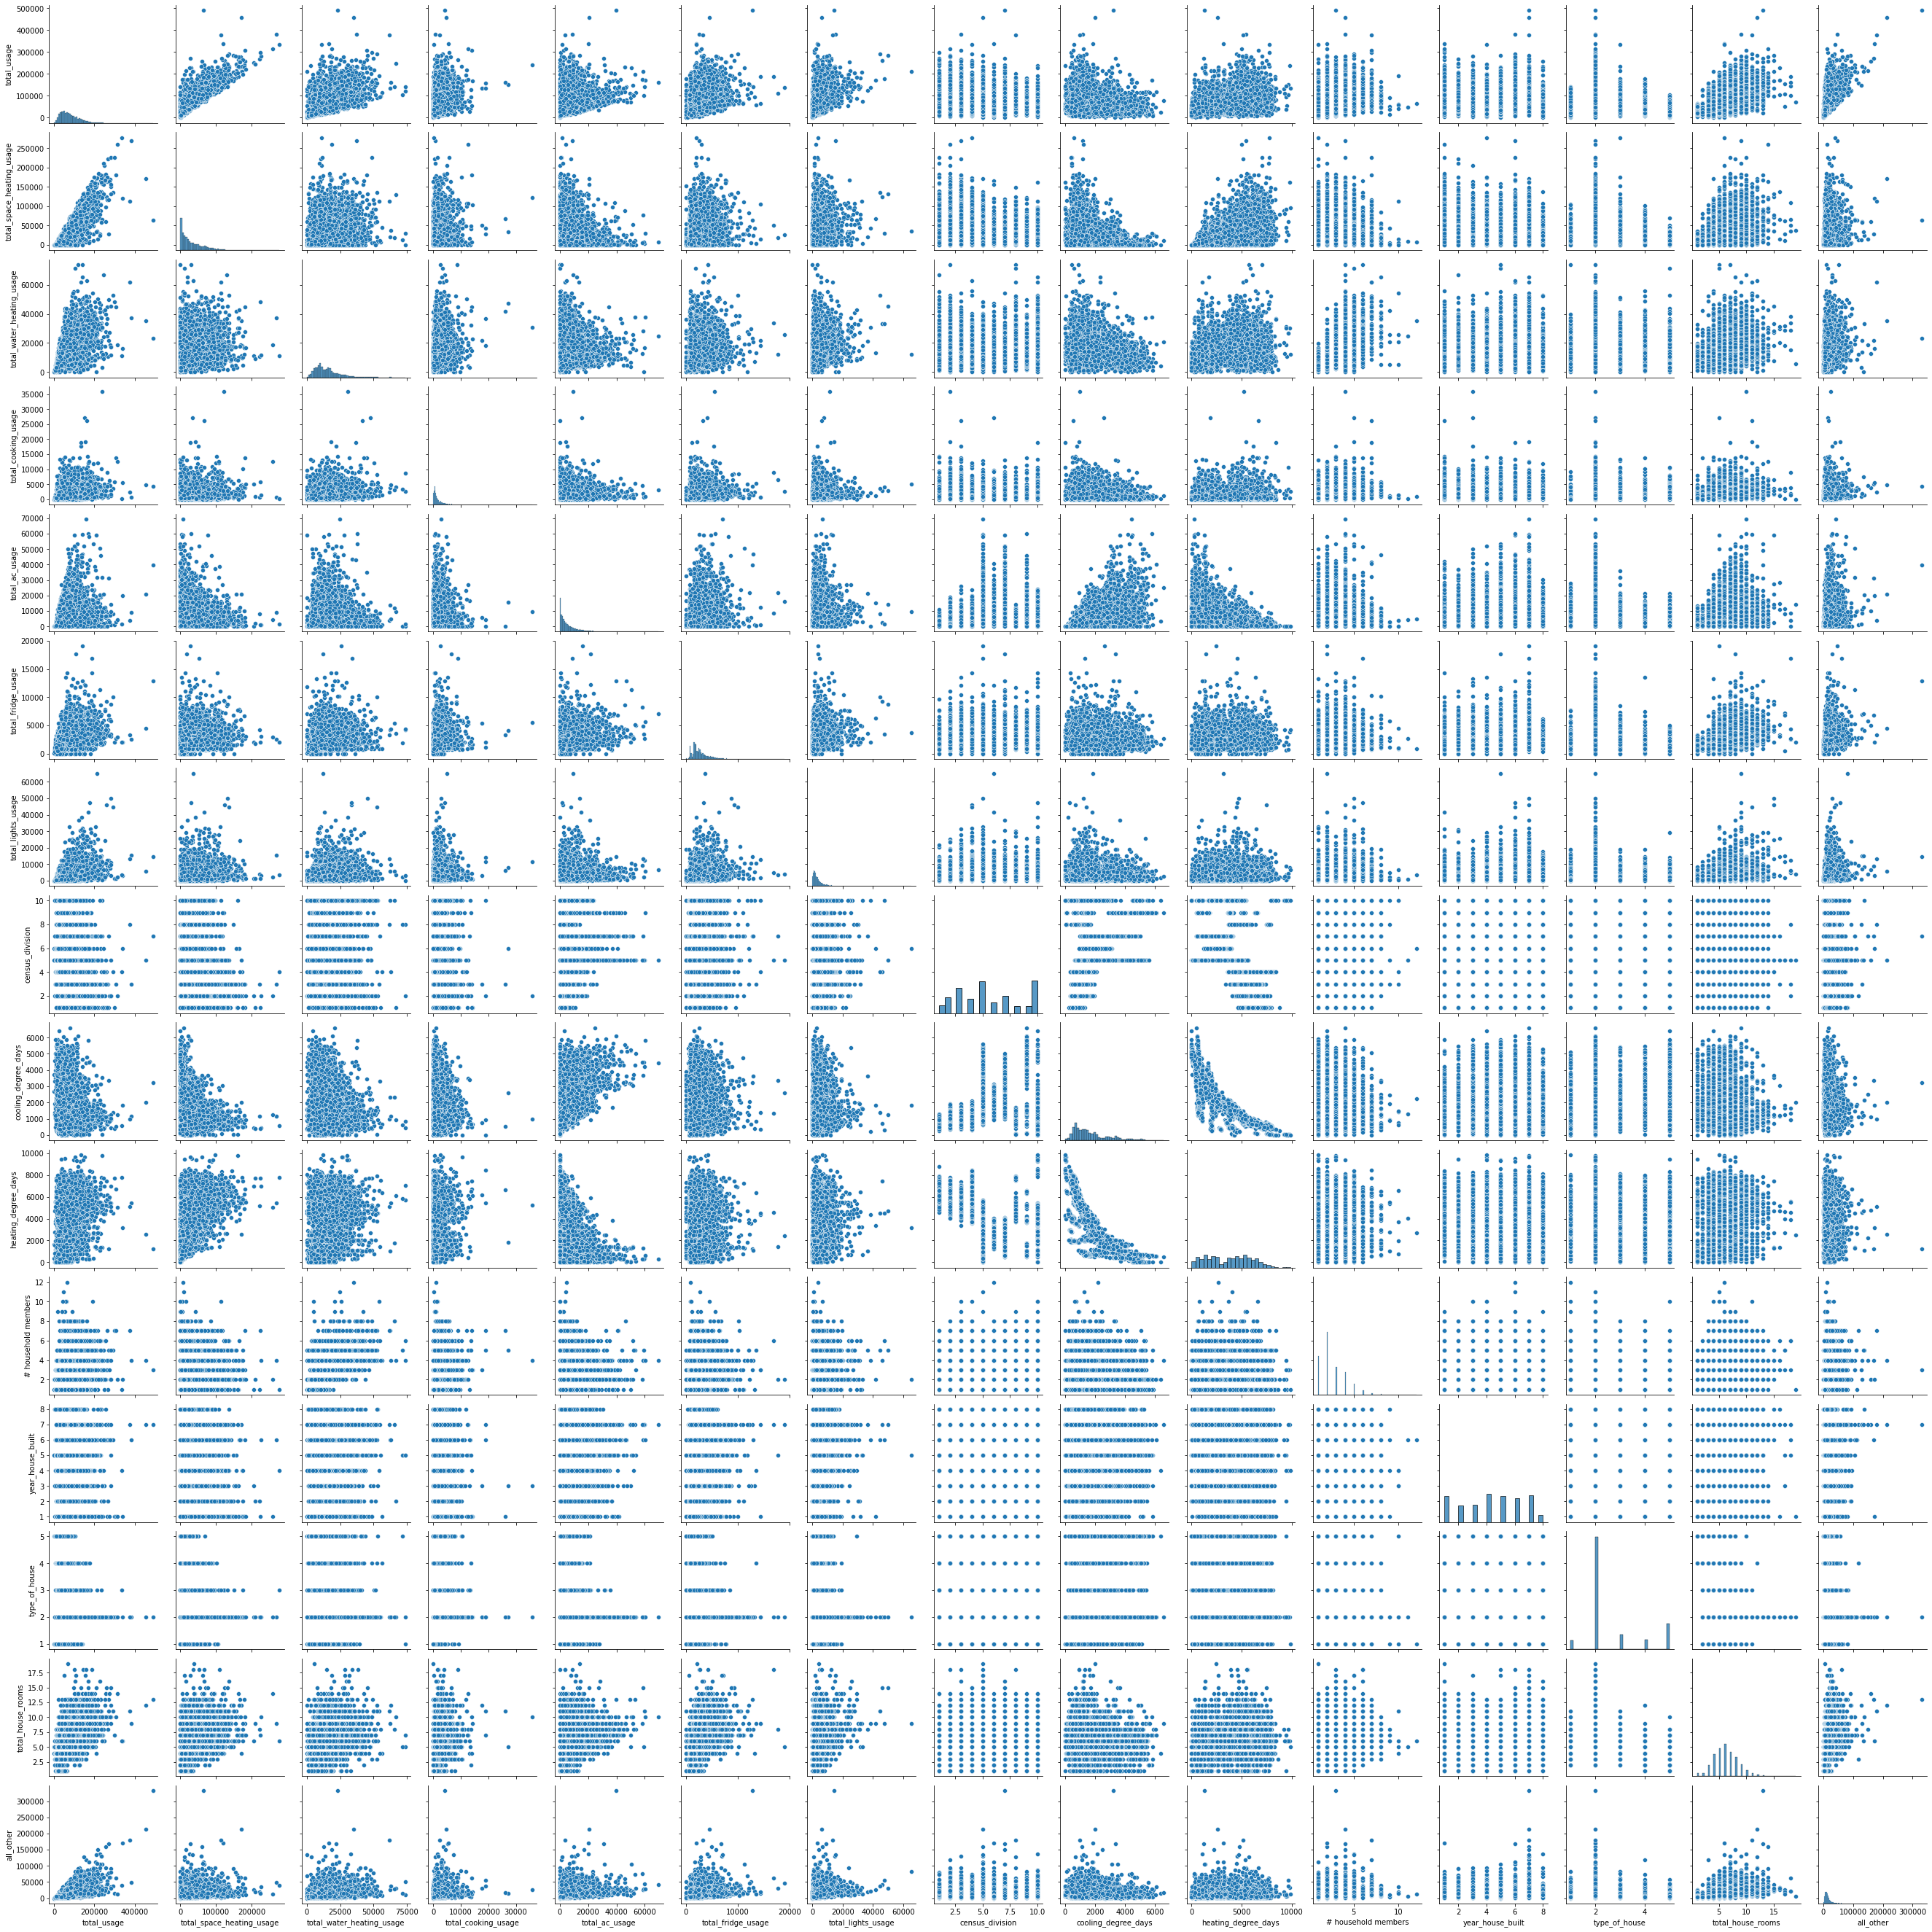

In [19]:
# pairplot 

g = sns.pairplot(sub_recs)

The first row of the pair plot compares total energy usage with the variables in the dataset.

While the pair plots echo many of the observations made above, it is interesting to note that while there is a positive relationship between total heating degree days and total energy usage, there is a negative relationship between cooling degree days and total energy usage. 